In [1]:
import sys
sys.path.append('..')

In [2]:
from sklearn.cluster import KMeans

import pandas as pd
pd.set_option("display.float_format", lambda x: '%.3f' % x)
import matplotlib.pyplot as plt
import pickle

import Sample

There is a clearly defined elbow at k=2 clusters in all 4 sample sets.

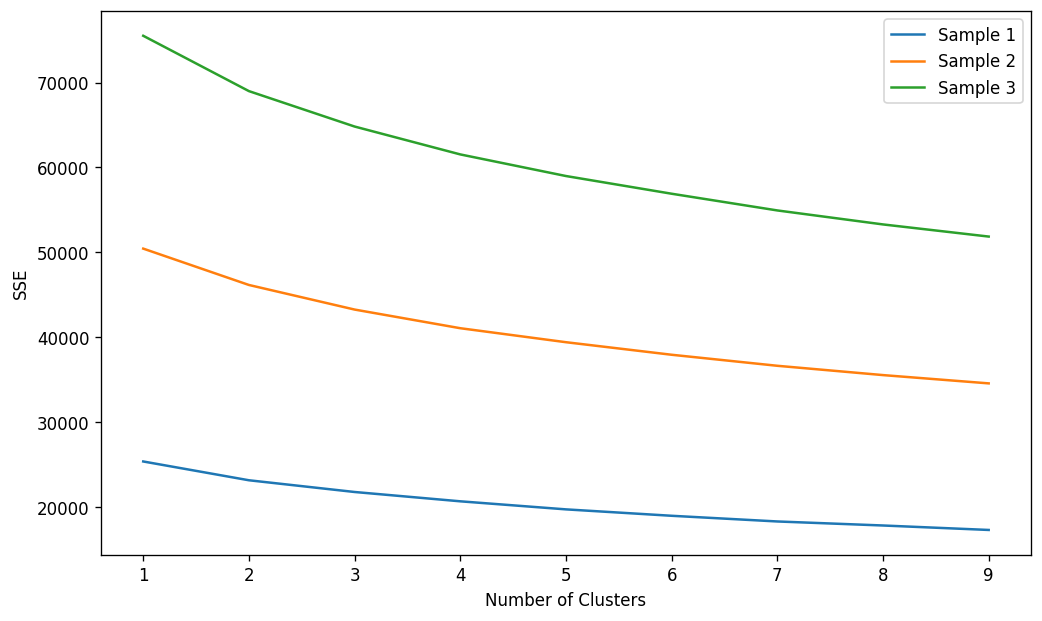

In [7]:
train_W = pd.read_csv("../data/5k_mixed.csv")
train_X = pd.read_csv("../data/10k_mixed.csv")
train_Z = pd.read_csv("../data/15k_mixed.csv")

W = train_W[[str(x) for x in range(1, 10)]].values
X = train_X[[str(x) for x in range(1, 10)]].values
Z = train_Z[[str(x) for x in range(1, 10)]].values

V = [W, X, Z]

all_err = dict()

plt.figure(figsize=(10, 6), dpi=120)
for ct, d in enumerate(V):
    sse = dict()
    for i in range(1, 10):
        kmeans = KMeans(n_clusters=i, max_iter=2500).fit(d)
        sse[i] = kmeans.inertia_
    plt.plot(list(sse.keys()), list(sse.values()), label=f"Sample {ct + 1}")
    # sse["sum"] = sum(sse.values())
    all_err[ct + 1] = sse
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.legend(loc="upper right")
plt.show()

Our SSE has no determinable point of convergence graphically. We will assume k=2 based on previous clustering using different data sets to observe the results.

In [9]:
# training the model to save using the largest dataset
model = KMeans(n_clusters=2)
model.fit(Z)

# verifying that the model works before saving
model.predict(W), model.inertia_

(array([1, 0, 0, ..., 1, 1, 1]), 68983.61625567212)

In [10]:
# saving
pickle.dump(model, open("../model_binaries/kmeans.sav", "wb"))